# Eye Traking training

We will use the model structure in [model.py](https://github.com/GRINGOLOCO7/Eye_Traking/blob/master/model/model.py) to train  the CNN to recognize eye gaze in a grid 10x10 of the screen of the computer

## Set Up env

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import sys
import os
script_dir = os.path.abspath("..")  # Go up one level from `train/`
sys.path.append(script_dir)
from model.model import *

## Load data for tensorflow

In [5]:
#train and test data directory
data_dir = "../dataset/dataset/train"
test_data_dir = "../dataset/dataset/test"


#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((30,155)),transforms.ToTensor()
])) # transforms.Resize((32, 160))  # Keep aspect ratio close to original
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((30,155)),transforms.ToTensor()
]))
img, label = dataset[0]
print(img.shape,label)
print("Follwing classes are there : ",dataset.classes)
print("Length of dataset : ",len(dataset))
print("Length of test dataset : ",len(test_dataset))
print("Length of classes : ",len(dataset.classes))

torch.Size([3, 30, 155]) 0
Follwing classes are there :  ['1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Length of dataset :  31998
Length of test dataset :  8000
Length of classes :  100


Using the dataset folders structure automaticaly build by [organize_dataset.py](https://github.com/GRINGOLOCO7/Eye_Traking/blob/master/dataset/organize_dataset.py), we are ready to train based on what torch expects...

A folder structure for train and test, with in each as many folders as classes to predict containing images of the class (in our case 100 classes containing imgaes of eyes looking in different grids of the screen)

Label : 1


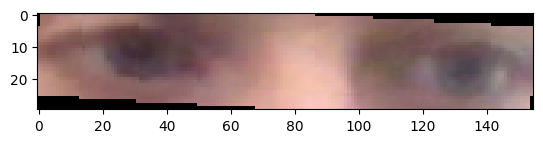

In [6]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

The firs image of the train dataset. 

It was randomly augmented and in this case rotated.

In [7]:
batch_size = 128
val_size = int(0.2*len(dataset))
train_size = len(dataset) - val_size

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

Length of Train Data : 25599
Length of Validation Data : 6399


We already splitted the entire set of imgaes in to 80-20 for training and testing. Hre we fourhter split in 80-20 for train and validate

In [ ]:
#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = os.cpu_count(), pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, shuffle=True, num_workers = os.cpu_count(), pin_memory = True)

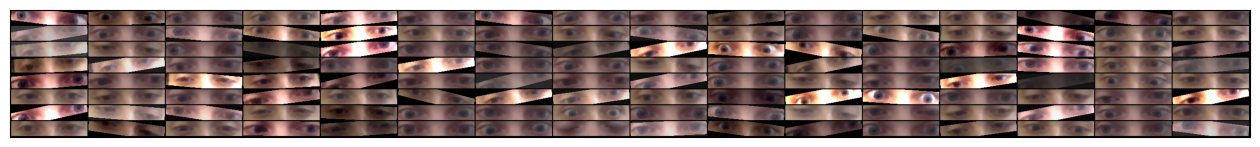

In [9]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break

show_batch(train_dl)

This is one batch

## Train

In [10]:
# Instantiate the model
model = ResNetModel(num_classes=100)
# Set up optimizer (you can experiment with learning rates)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
# Set the criterion (loss function)
criterion = nn.CrossEntropyLoss()
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
history = fit(15, 0.001, model, train_dl, val_dl, optim.Adam)

Epoch [0], train_loss: 2.5527, val_loss: 1.1666, val_acc: 0.5804
Epoch [1], train_loss: 0.9945, val_loss: 1.1360, val_acc: 0.6057
Epoch [2], train_loss: 0.6633, val_loss: 0.5410, val_acc: 0.8089
Epoch [3], train_loss: 0.4961, val_loss: 0.4406, val_acc: 0.8453
Epoch [4], train_loss: 0.4143, val_loss: 0.5519, val_acc: 0.8051
Epoch [5], train_loss: 0.3424, val_loss: 0.4598, val_acc: 0.8453
Epoch [6], train_loss: 0.3016, val_loss: 0.3155, val_acc: 0.8912
Epoch [7], train_loss: 0.2647, val_loss: 0.2198, val_acc: 0.9216
Epoch [8], train_loss: 0.2444, val_loss: 0.2289, val_acc: 0.9231
Epoch [9], train_loss: 0.2336, val_loss: 0.4242, val_acc: 0.8694
Epoch [10], train_loss: 0.2048, val_loss: 0.2320, val_acc: 0.9250
Epoch [11], train_loss: 0.1755, val_loss: 0.3460, val_acc: 0.9026
Epoch [12], train_loss: 0.1690, val_loss: 0.3410, val_acc: 0.8950
Epoch [13], train_loss: 0.1692, val_loss: 0.1458, val_acc: 0.9537
Epoch [14], train_loss: 0.1335, val_loss: 0.2105, val_acc: 0.9358


## Analyze Results 

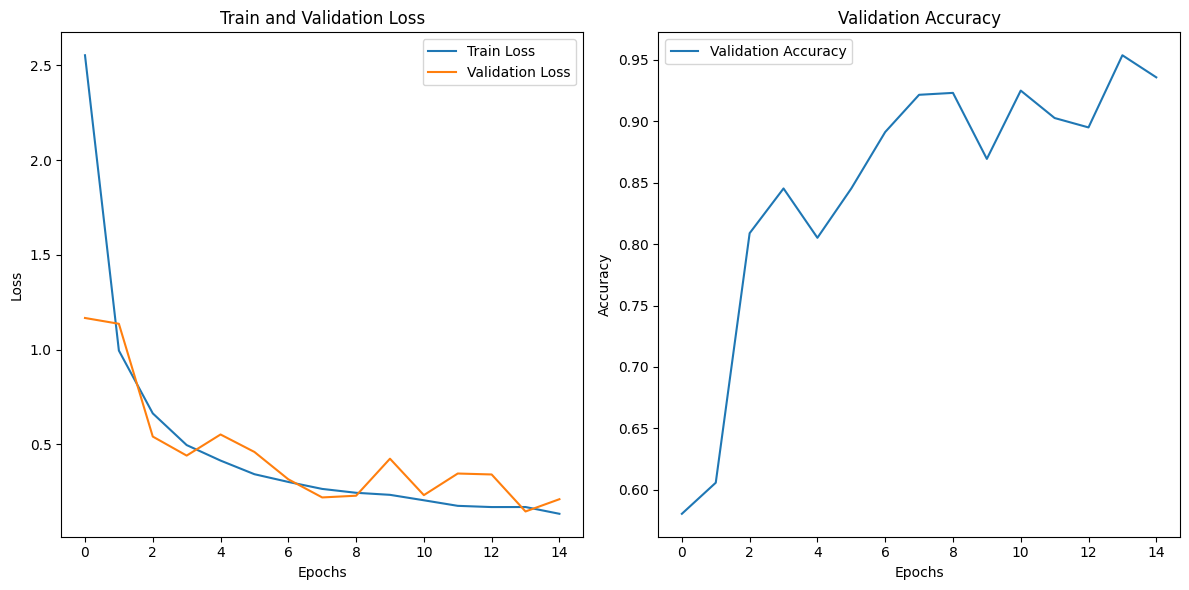

In [12]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy values from history
train_losses = [x['train_loss'] for x in history]
val_losses = [x['val_loss'] for x in history]
val_accuracies = [x['val_acc'] for x in history]

# Plotting loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The losses are consistent, meaning the the model shouldn't be overfitting and it is learning correctly given also a high accuracy above 90%

## Test

Test the trained model and the test dataset (never seen immages)

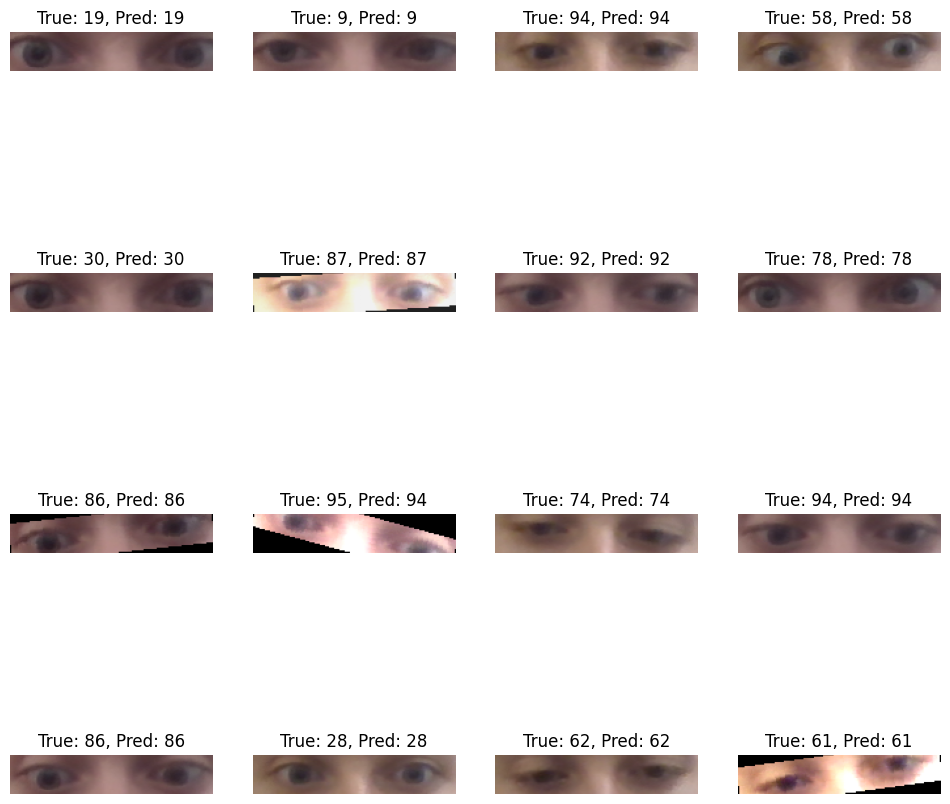

In [14]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
# Function to show images with labels and predictions
def show_predictions(model, loader):
    model.eval()
    images, labels = next(iter(loader))  # Get a batch of images and labels
    images, labels = images.to(device), labels.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    # Plot images, true labels, and predicted labels
    plt.figure(figsize=(12, 12))
    for i in range(16):  # Show 16 images
        plt.subplot(4, 4, i+1)
        image = images[i].cpu().numpy().transpose((1, 2, 0))  # Convert to HWC format
        plt.imshow(image)
        true_label = labels[i].item()
        pred_label = preds[i].item()
        plt.title(f'True: {true_label}, Pred: {pred_label}')
        plt.axis('off')
    plt.show()

# Show predictions on a test batch
show_predictions(model, test_loader)

In [15]:
# Compute test accuracy
def test_accuracy(model, test_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return accuracy

# Print the test accuracy
test_acc = test_accuracy(model, test_loader)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Test Accuracy: 93.14%


High accuracy in predictin eye gaze!!!

## Save Model

In [16]:
# Save the model's state_dict
torch.save(model.state_dict(), 'resnet_model.pth')
print("Model saved as 'resnet_model.pth'")

# To load the model later, you can use:
# model = ResNetModel(num_classes=100)
# model.load_state_dict(torch.load('resnet_model.pth'))
# model.eval()

Model saved as 'resnet_model.pth'


### Load the model and test on new images collected live

In [17]:
model = ResNetModel(num_classes=100)
model.load_state_dict(torch.load('resnet_model.pth'))
model.eval()

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [18]:
from PIL import Image
# Function to predict the class of an folder of new images
folder_path = "../test/test_images" # inside we have n images named as <class_number>.jpg
def predict_folder(model, folder_path):
    img_files = os.listdir(folder_path)
    img_files = [f for f in img_files if f.endswith('.png')]
    img_files.sort()
    for img_file in img_files:
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        print(img.size)
        #img = img.resize((30, 155))
        img = transforms.ToTensor()(img)
        img = img.unsqueeze(0)
        #img = img.to(device)
        model.eval()
        with torch.no_grad():
            out = model(img)
            _, pred = torch.max(out, 1)
            print(img_path, pred.item())

# Predict the classes of images in the folder
predict_folder(model, folder_path)

(155, 30)
../test/test_images\43.png 69
(155, 30)
../test/test_images\88.png 33
(155, 30)
../test/test_images\94.png 37


../test/test_images/43.png


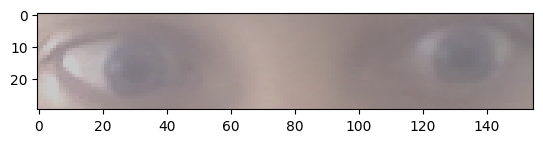

69


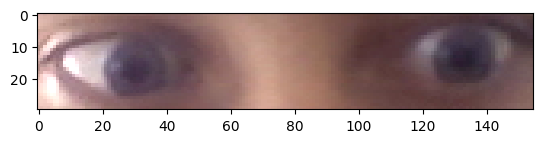

69


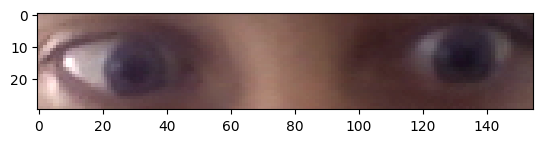

69


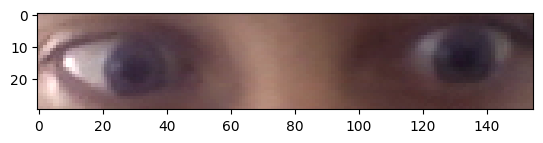

69


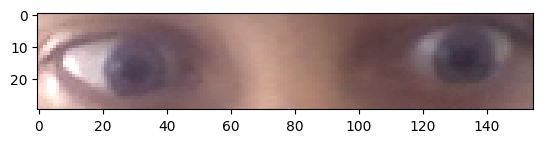

69


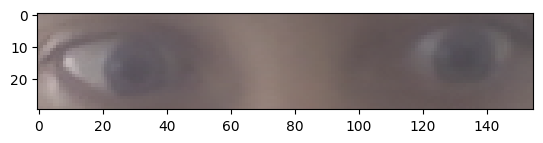

69


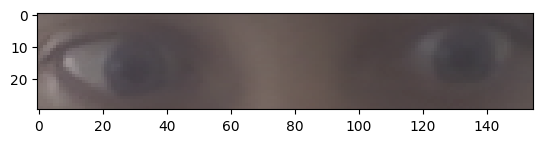

69


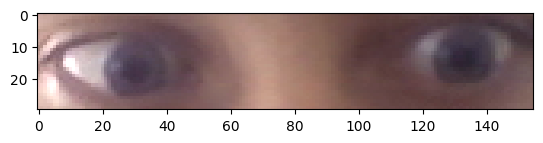

69


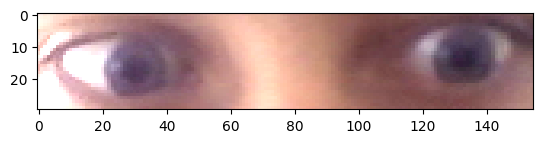

69


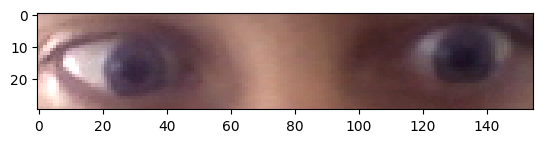

69


In [20]:
from PIL import ImageEnhance
import random

# predict 10 times the same image
image_path = "../test/test_images/43.png"
def predict_image(model, imge_path):
    print(imge_path)
    for i in range(10):
        img = Image.open(imge_path)
        # Random brightness & contrast adjustment
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(random.uniform(0.7, 1.3))
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(random.uniform(0.5, 2))
        # show image
        plt.imshow(img)
        plt.show()
        img = transforms.ToTensor()(img)
        img = img.unsqueeze(0)
        #img = img.to(device)
        model.eval()
        with torch.no_grad():
            out = model(img)
            _, pred = torch.max(out, 1)
            print(pred.item())

# Predict the classes of images in the folder
predict_image(model, image_path)